# Perceptron Algorithm

The **Perceptron** is one of the earliest and simplest algorithms for binary classification. It models a linear decision boundary between two linearly separable classes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hypothesis

Given input features $ x \in \mathbb{R}^n $, the model computes:

$$
\hat{y} = \text{sign}(\theta^T x + b)
$$

Where:
- $ \theta $: weight vector
- $ b $: bias term (we include this in $ \theta $ as an extra dimension with value 1)
- $ \hat{y} \in \{-1, 1\} $: predicted label


In [20]:
# Generate synthetic data

np.random.seed(42)
X = np.random.randn(100,2)
y = np.where(X[:, 0] + X[:,1] > 0, 1, -1)
print(X)
print(y)

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763 ]
 [ 0.0675282  -1.42474819]
 [-0.54438272  0.11092259]
 [-1.15099358  0.37569802]
 [-0.60063869 -0.29169375]
 [-0.60170661  1.85227818]
 [-0.01349722 -1.05771093]
 [ 0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012]
 [-1.32818605  0.19686124]
 [ 0.73846658  0.17136828]
 [-0.11564828 -0.3011037 ]
 [-1.47852199 -0.71984421]
 [-0.46063877  1.05712223]
 [ 0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228]
 [-0.676922    0.61167629]
 [ 1.03099952  0.93128012]
 [-0.83921752 -0.30921238]
 [ 0.33126343  0.97554513]
 [-0.47917424 -0.18565898]
 [-1.10633497 -1.19620662]
 [ 0.81252582  1.35624003]
 [-0.07201012  1.0035329 ]
 [ 0.36163603 -0.64511975]
 [ 0.36139561  1.53803657]
 [-0.03582604  1.56464366]
 

The perceptron learns by updating the weights when a point is misclassified:

If:
$$
y^{(i)}(\theta^T x^{(i)} + b) \leq 0
$$

Then:
$$
\theta := \theta + \alpha y^{(i)} x^{(i)} \\
b := b + \alpha y^{(i)}
$$

Where:
- $ \alpha $: learning rate
- $ y^{(i)} \in \{-1, 1\} $: true label
- $ x^{(i)} $: input vector


In [16]:
def perceptron_train(X, y, lr= 0.1,epochs = 10):
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    theta = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if y[i] * np.dot(theta, X[i]) <= 0:
                theta += lr * y[i] * X[i]
    return theta

In [17]:
def perceptron_predict(X, theta):
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    return np.sign(X @ theta)

In [18]:
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(theta[0]*x_vals + theta[2]) / theta[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

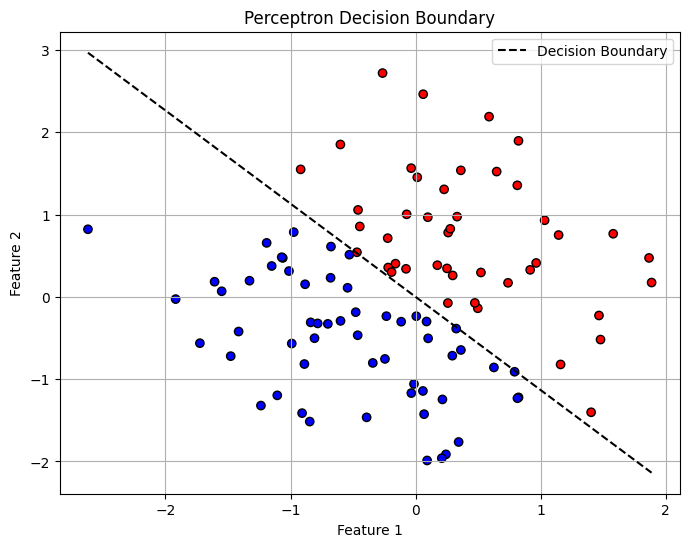

In [19]:
theta = perceptron_train(X, y)
plot_decision_boundary(X, y, theta)

## Summary

- Works only for **linearly separable** data
- Converges in finite steps if data is separable
- Simple and fast, but can't model non-linear decision boundaries

Linear regression tries to minimize error even for correctly predicted points.
Perceptron only cares whether you're right or wrong, it ignores points that are correctly classified.
